In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# bigfoot

In [2]:
bf_data = pd.read_csv('bfro_reports_geocoded.csv')

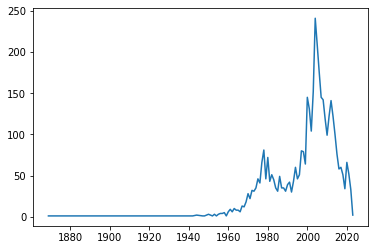

In [3]:
bf_years = pd.to_numeric(bf_data[bf_data['date'].notnull()]['date'].str.slice(0,4)).reset_index(drop=True).value_counts().sort_index()
plt.plot(bf_years)

In [4]:
pd.DataFrame(bf_years).reset_index().rename({"index": "year", "date": "count"}, axis=1).to_csv('bigfoot_sightings.csv', index=False)

# ufo

In [5]:
ufo_data = pd.read_csv('scrubbed.csv')

c:\Python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#ufo_years = pd.to_numeric(ufo_data[ufo_data['date posted'].notnull()]['date posted'].str[-4:]).reset_index(drop=True).value_counts().sort_index()
ufo_years = pd.to_datetime(ufo_data['date posted']).dt.to_period("Y")
idx = pd.period_range(min(ufo_years), max(ufo_years))
ufo_years = ufo_years.value_counts().reindex(idx, fill_value=0)
ufo_years

1998     890
1999    4286
2000    3042
2001    3496
2002    4230
2003    4792
2004    5224
2005    5288
2006    4399
2007    4875
2008    5121
2009    5936
2010    4446
2011    5616
2012    8090
2013    7562
2014    3039
Freq: A-DEC, Name: date posted, dtype: int64

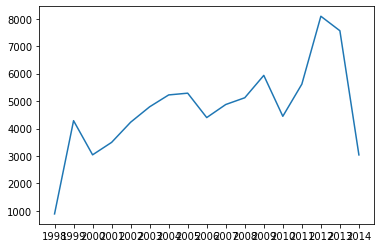

In [7]:
x = np.arange(0,len(ufo_years),1)
fig, ax = plt.subplots(1,1)
ax.plot(x, ufo_years)
ax.set_xticks(x)
ax.set_xticklabels(ufo_years.index)
plt.show()

In [8]:
pd.DataFrame(ufo_years).reset_index().rename({"index": "year", "date posted": "count"}, axis=1).to_csv('benjaminsacks.github.io\\ufo_sightings.csv', index=False)